# Generating visualizations of Seuma data
Looking at raw data from the Seuma paper to determine how well the ortho_seqs results compares to the empirical data.

Last updated: 8/4/22

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.stats import mannwhitneyu, ranksums

In [2]:
data = pd.read_csv(
    "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/data/seuma_single_aa.csv"
)
data

,Pos,WT_AA,Mut,nscore
0,1,D,K,-0.117352
1,1,D,N,0.352500
2,1,D,T,-2.818013
3,1,D,S,0.121805
4,1,D,I,-2.404340
...,...,...,...,...
463,42,A,E,-2.877642
464,42,A,G,-1.970039
465,42,A,V,0.461437
466,42,A,S,-0.192409


In [3]:
out_dir = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/add_later_results/seuma_viz/"

In [4]:
gk_sites = [1, 3, 7, 11, 17, 22, 42]  # not zero indexed
nterm_sites = [2, 4, 5, 6, 8, 9, 10, 12, 13, 14, 15, 16, 18, 19, 20, 21, 23, 24, 25, 26]
cterm_sites = list(np.arange(27, 42))
ngk_sites = list(np.arange(1, 27))
cgk_sites = list(np.arange(27, 43))

# Density curves

## Prep data

In [5]:
density_data = data.drop(columns=["WT_AA", "Mut"]).copy()

In [6]:
gk_df = density_data[density_data["Pos"].isin(gk_sites)]
nterm_df = density_data[density_data["Pos"].isin(nterm_sites)]
cterm_df = density_data[density_data["Pos"].isin(cterm_sites)]
ngk_df = density_data[density_data["Pos"].isin(ngk_sites)]
cgk_df = density_data[density_data["Pos"].isin(cgk_sites)]

## Gatekeeper

In [7]:
gk_experimental = gk_df["nscore"]
gk_experimental

0     -0.117352
1      0.352500
2     -2.818013
3      0.121805
4     -2.404340
         ...   
463   -2.877642
464   -1.970039
465    0.461437
466   -0.192409
467    0.982337
Name: nscore, Length: 79, dtype: float64

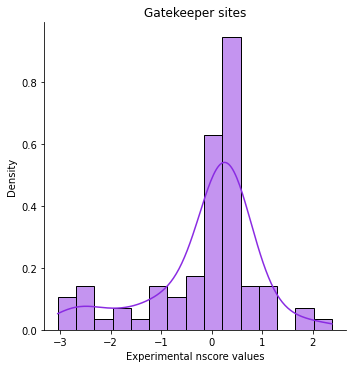

In [8]:
sns.displot(gk_experimental, kde=True, color="blueviolet", stat="density")
plt.xlabel("Experimental nscore values")
plt.ylabel("Density")
plt.title("Gatekeeper sites")
plt.savefig(out_dir + "gatekeeper_density_exp.png", dpi=400)

In [9]:
gk_regressions_path = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/local_ortho_seq_results/gk_all_first/amyloid_gk_nostop_regressions.npz"
gk_regressions = np.load(gk_regressions_path)
gk_rFon1D = gk_regressions["amyloid_gk_nostop_rFon1D"]
gk_rFon1D_flat = list(gk_rFon1D.flatten())

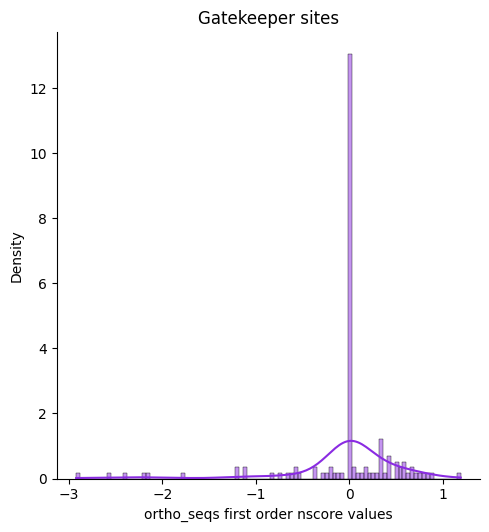

In [10]:
sns.displot(gk_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order nscore values")
plt.ylabel("Density")
plt.title("Gatekeeper sites")
plt.savefig(out_dir + "gatekeeper_density_os.png", dpi=400)

In [11]:
_, p = mannwhitneyu(gk_experimental, gk_rFon1D_flat)
p

0.09149008129997091

In [12]:
nz_gk_rFon1D_flat = [i for i in gk_rFon1D_flat if i != 0]

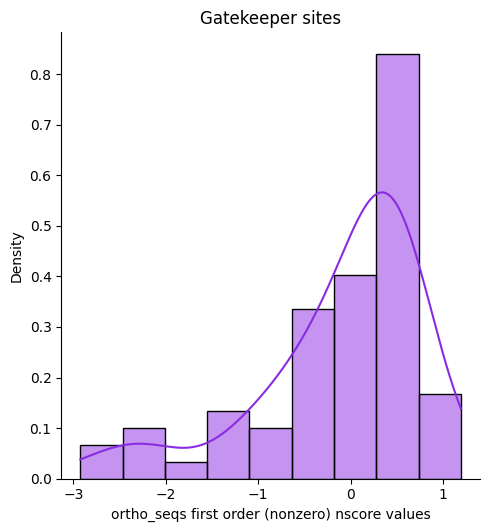

In [13]:
sns.displot(nz_gk_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order (nonzero) nscore values")
plt.ylabel("Density")
plt.title("Gatekeeper sites")
plt.savefig(out_dir + "gatekeeper_density_os_nz.png", dpi=400)

In [14]:
_, p = mannwhitneyu(gk_experimental, nz_gk_rFon1D_flat)
p

0.8661026936001056

## N-terminus

In [15]:
nterm_experimental = nterm_df["nscore"]
nterm_experimental

13    -0.773028
14    -0.172021
15    -2.697274
16    -0.131345
17    -0.672862
         ...   
285   -0.391315
286    0.921193
287   -0.382831
288   -1.161419
289   -0.769686
Name: nscore, Length: 219, dtype: float64

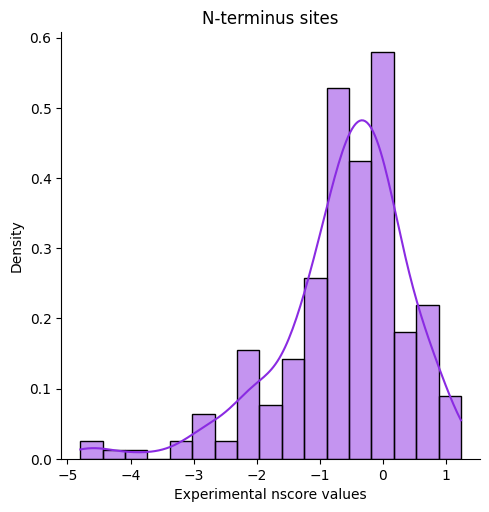

In [16]:
sns.displot(nterm_experimental, kde=True, color="blueviolet", stat="density")
plt.xlabel("Experimental nscore values")
plt.ylabel("Density")
plt.title("N-terminus sites")
plt.savefig(out_dir + "nterm_density_exp.png", dpi=400)

In [17]:
nterm_regressions_path = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/nterm_all_first0/amyloid_nterm_nostop_regressions.npz"
nterm_regressions = np.load(nterm_regressions_path)
nterm_rFon1D = nterm_regressions["amyloid_nterm_nostop_rFon1D"]
nterm_rFon1D_flat = list(nterm_rFon1D.flatten())

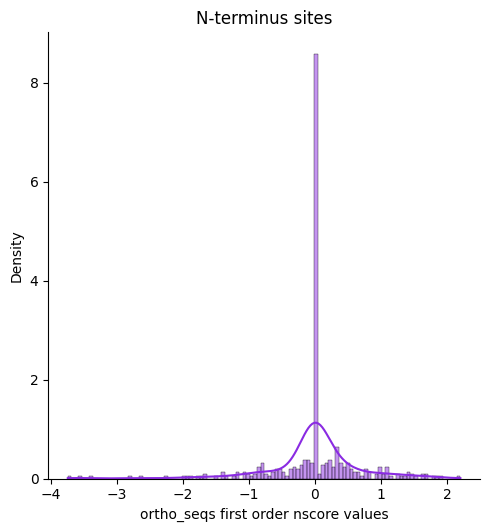

In [18]:
sns.displot(nterm_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order nscore values")
plt.ylabel("Density")
plt.title("N-terminus sites")
plt.savefig(out_dir + "nterm_density_os.png", dpi=400)

In [19]:
_, p = mannwhitneyu(nterm_experimental, nterm_rFon1D_flat)
p

1.9159519949458895e-18

In [20]:
nz_nterm_rFon1D_flat = [i for i in nterm_rFon1D_flat if i != 0]

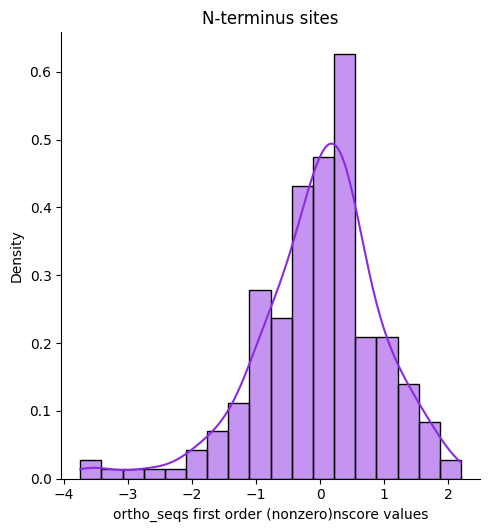

In [21]:
sns.displot(nz_nterm_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order (nonzero)nscore values")
plt.ylabel("Density")
plt.title("N-terminus sites")
plt.savefig(out_dir + "nterm_density_os_nz.png", dpi=400)

In [22]:
_, p = mannwhitneyu(nterm_experimental, nz_nterm_rFon1D_flat)
p

6.015528914428487e-11

## C-terminus

In [23]:
cterm_experimental = cterm_df["nscore"]
cterm_experimental

290   -2.827167
291   -2.182950
292   -2.454548
293    0.341534
294    0.478850
         ...   
455   -4.399539
456   -3.784214
457   -2.282670
458   -4.164585
459    0.622472
Name: nscore, Length: 170, dtype: float64

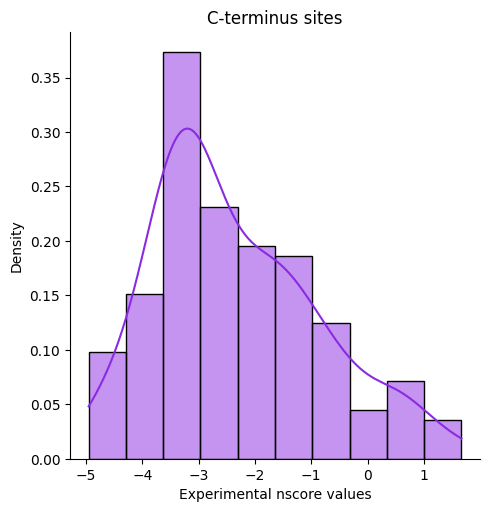

In [24]:
sns.displot(cterm_experimental, kde=True, color="blueviolet", stat="density")
plt.xlabel("Experimental nscore values")
plt.ylabel("Density")
plt.title("C-terminus sites")
plt.savefig(out_dir + "cterm_density_exp.png", dpi=400)

In [25]:
cterm_regressions_path = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/cterm_all_first/amyloid_cterm_nostop_regressions.npz"
cterm_regressions = np.load(cterm_regressions_path)
cterm_rFon1D = cterm_regressions["amyloid_cterm_nostop_rFon1D"]
cterm_rFon1D_flat = list(cterm_rFon1D.flatten())

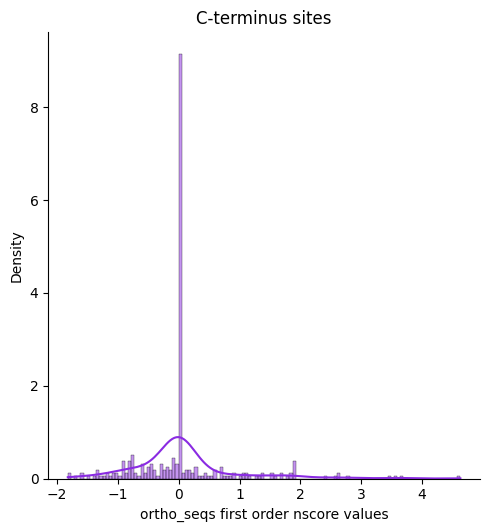

In [26]:
sns.displot(cterm_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order nscore values")
plt.ylabel("Density")
plt.title("C-terminus sites")
plt.savefig(out_dir + "cterm_density_os.png", dpi=400)

In [27]:
_, p = mannwhitneyu(cterm_experimental, cterm_rFon1D_flat)
p

2.301371151204786e-49

In [28]:
nz_cterm_rFon1D_flat = [i for i in cterm_rFon1D_flat if i != 0]

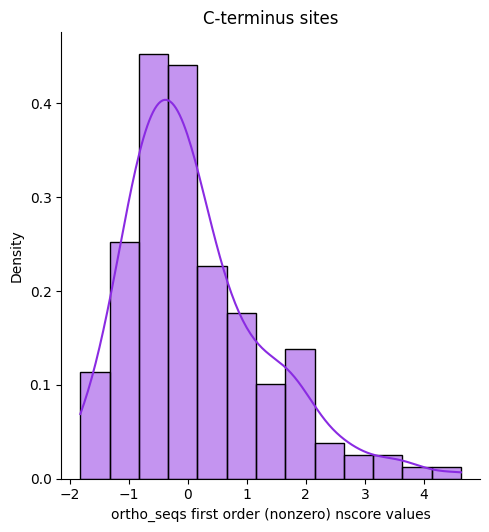

In [29]:
sns.displot(nz_cterm_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order (nonzero) nscore values")
plt.ylabel("Density")
plt.title("C-terminus sites")
plt.savefig(out_dir + "cterm_density_os_nz.png", dpi=400)

In [30]:
_, p = mannwhitneyu(cterm_experimental, nz_cterm_rFon1D_flat)
p

8.475207387241603e-36

## C-terminus (with gatekeepers)

In [31]:
cgk_experimental = cgk_df["nscore"]
cgk_experimental

290   -2.827167
291   -2.182950
292   -2.454548
293    0.341534
294    0.478850
         ...   
463   -2.877642
464   -1.970039
465    0.461437
466   -0.192409
467    0.982337
Name: nscore, Length: 178, dtype: float64

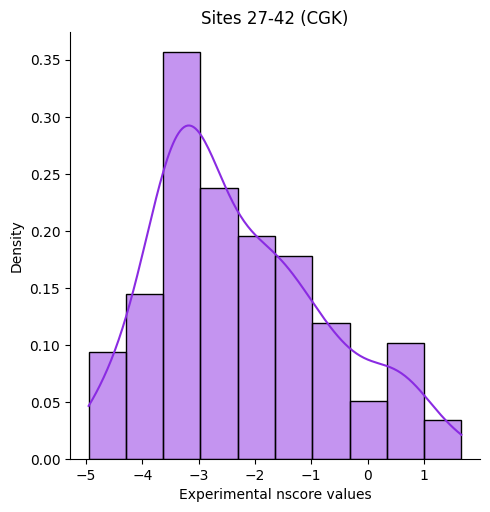

In [32]:
sns.displot(cgk_experimental, kde=True, color="blueviolet", stat="density")
plt.xlabel("Experimental nscore values")
plt.ylabel("Density")
plt.title("Sites 27-42 (CGK)")
plt.savefig(out_dir + "cgk_density_exp.png", dpi=400)

In [33]:
cgk_regressions_path = "/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/cgk_all_first/amyloid_cgk_nostop_regressions.npz"
cgk_regressions = np.load(cgk_regressions_path)
cgk_rFon1D = cgk_regressions["amyloid_cgk_nostop_rFon1D"]
cgk_rFon1D_flat = list(cgk_rFon1D.flatten())

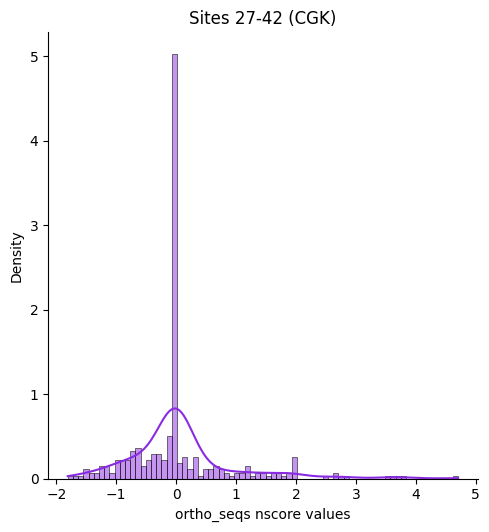

In [34]:
sns.displot(cgk_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs nscore values")
plt.ylabel("Density")
plt.title("Sites 27-42 (CGK)")
plt.savefig(out_dir + "cgk_density_os.png", dpi=400)

In [35]:
_, p = mannwhitneyu(cgk_experimental, cgk_rFon1D_flat)
p

1.2578242953421908e-47

In [36]:
nz_cgk_rFon1D_flat = [i for i in cgk_rFon1D_flat if i != 0]

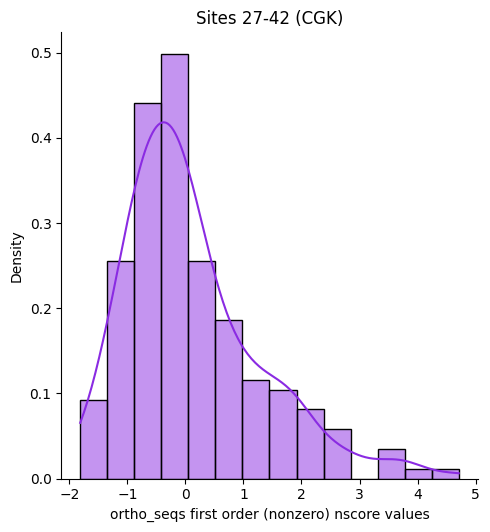

In [37]:
sns.displot(nz_cgk_rFon1D_flat, kde=True, color="blueviolet", stat="density")
plt.xlabel("ortho_seqs first order (nonzero) nscore values")
plt.ylabel("Density")
plt.title("Sites 27-42 (CGK)")
plt.savefig(out_dir + "cgk_density_os_nz.png", dpi=400)

In [38]:
_, p = mannwhitneyu(cgk_experimental, nz_cgk_rFon1D_flat)
p

1.1831090139997892e-36

## N-terminus (with gatekeepers)

In [39]:
ngk_experimental = ngk_df["nscore"]
ngk_experimental

0     -0.117352
1      0.352500
2     -2.818013
3      0.121805
4     -2.404340
         ...   
285   -0.391315
286    0.921193
287   -0.382831
288   -1.161419
289   -0.769686
Name: nscore, Length: 290, dtype: float64

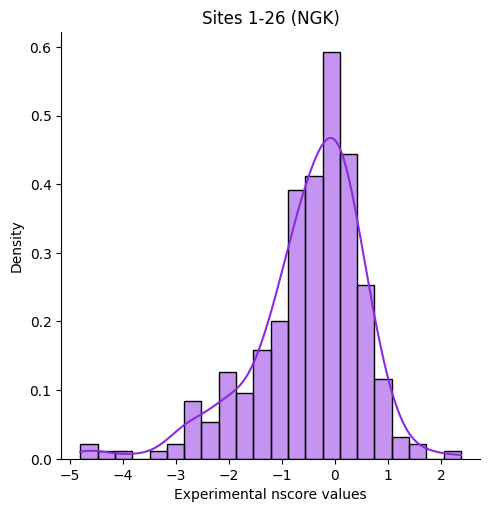

In [40]:
sns.displot(ngk_experimental, kde=True, color="blueviolet", stat="density")
plt.xlabel("Experimental nscore values")
plt.ylabel("Density")
plt.title("Sites 1-26 (NGK)")
plt.savefig(out_dir + "ngk_density_exp.png", dpi=400)

In [41]:
# NOT DONE YET

# ngk_regressions_path = '/Users/olivia.yoo/Desktop/code/ortho_seqs/amyloid_beta/server_ortho_seq_results/ngk_all_first/amyloid_ngk_nostop_regressions.npz'
# ngk_regressions = np.load(ngk_regressions_path)
# ngk_rFon1D = ngk_regressions["amyloid_ngk_nostop_rFon1D"]
# ngk_rFon1D_flat = list(ngk_rFon1D.flatten())
# the following line will eliminate all zeros in the list
# rFon1D_flat = [i for i in rFon1D_flat if i != 0]

# Heatmaps

## Prep data

In [42]:
coolwarmnan = cm.get_cmap("coolwarm").copy()
coolwarmnan.set_bad("white")
cm.register_cmap("coolwarm_nanwhite", coolwarmnan)

In [43]:
AAs = [
    "A",
    "C",
    "D",
    "E",
    "F",
    "G",
    "H",
    "I",
    "K",
    "L",
    "M",
    "N",
    "P",
    "Q",
    "R",
    "S",
    "T",
    "V",
    "W",
    "Y",
]
idx_AAs = np.arange(0, 21)
AA_dict = dict(zip(AAs, idx_AAs))
AA_dict

{'A': 0,
 'C': 1,
 'D': 2,
 'E': 3,
 'F': 4,
 'G': 5,
 'H': 6,
 'I': 7,
 'K': 8,
 'L': 9,
 'M': 10,
 'N': 11,
 'P': 12,
 'Q': 13,
 'R': 14,
 'S': 15,
 'T': 16,
 'V': 17,
 'W': 18,
 'Y': 19}

In [44]:
n_seqs = len(data)

seuma_arr = np.empty((42, 20))
seuma_arr[:] = np.nan

for i in range(n_seqs):
    curr_mut = data["Mut"][i]
    aa_idx = AA_dict[curr_mut]
    curr_pos = data["Pos"][i] - 1
    seuma_arr[curr_pos][aa_idx] = data["nscore"][i]

seuma_arr

array([[ 5.14630000e-02,  6.65149630e-02,             nan,
         1.74793380e-02,  3.27002734e-01,  3.70180591e-01,
         1.33307939e-01, -2.40434015e+00, -1.17351649e-01,
                    nan,             nan,  3.52500137e-01,
                    nan,             nan,             nan,
         1.21805256e-01, -2.81801317e+00, -1.70500266e+00,
                    nan, -3.23957331e-01],
       [            nan,             nan, -3.00830437e-01,
        -6.72862387e-01,             nan, -3.55912190e-02,
                    nan, -2.69727383e+00, -7.73028187e-01,
        -1.57799113e+00,             nan,             nan,
        -1.31344862e-01,             nan,             nan,
        -1.71699098e-01, -1.72021495e-01, -1.27539020e+00,
                    nan,             nan],
       [ 1.93964150e-01,             nan, -9.65864150e-02,
                    nan,             nan,  3.68912549e-01,
                    nan,             nan,  5.50202523e-01,
        -2.43997310e+00,  2.2

## Gatekeeper

In [45]:
# prep gatekeeper array

n_gk = len(gk_sites)

gk_seuma = np.zeros((n_gk, 20))

for i in range(n_gk):
    site = gk_sites[i] - 1
    site_arr = seuma_arr[site]
    gk_seuma[i] = site_arr

gk_seuma_hm = np.swapaxes(gk_seuma, 0, 1)
gk_seuma_df = pd.DataFrame(gk_seuma_hm, columns=gk_sites)
gk_seuma_df

,1,3,7,11,17,22,42
0,0.051463,0.193964,0.169292,0.227514,NaN,1.139878,NaN
1,0.066515,NaN,-0.929543,NaN,-3.044584,NaN,NaN
2,NaN,-0.096586,NaN,0.353421,NaN,0.289130,NaN
3,0.017479,NaN,-0.064813,NaN,NaN,NaN,-2.877642
4,0.327003,NaN,-0.866126,NaN,0.742644,NaN,NaN
5,0.370181,0.368913,0.293544,0.620172,NaN,2.377941,-1.970039
6,0.133308,NaN,0.399093,NaN,NaN,NaN,NaN
7,-2.404340,NaN,-0.798616,-0.061796,1.054232,-1.625281,NaN
8,-0.117352,0.550203,NaN,0.119955,0.223049,0.532519,NaN
9,NaN,-2.439973,NaN,-0.469500,NaN,-1.217811,0.982337


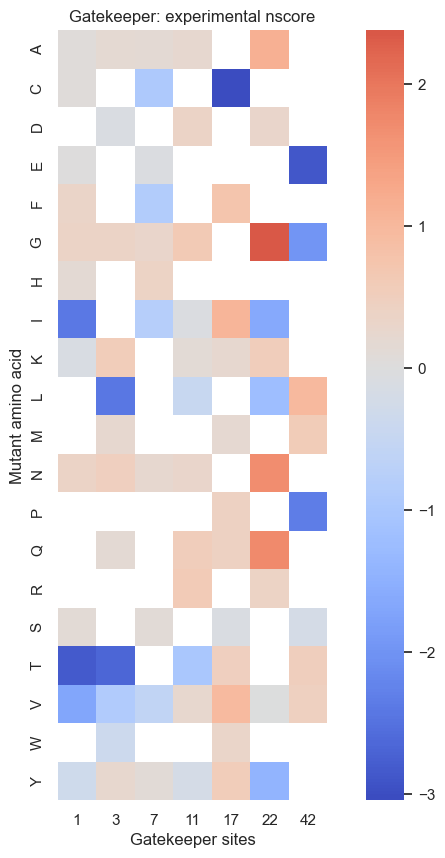

In [46]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    gk_seuma_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.xlabel("Gatekeeper sites")
plt.ylabel("Mutant amino acid")
plt.title("Gatekeeper: experimental nscore")
plt.savefig(out_dir + "gatekeeper_heatmap_exp.png", dpi=400)

In [47]:
for i in range(n_gk):
    for j in range(20):
        if np.isnan(gk_seuma[i][j]):
            gk_rFon1D[i][j] = np.nan

gk_rFon1D_hm = np.swapaxes(gk_rFon1D, 0, 1)
gk_os_df = pd.DataFrame(gk_rFon1D_hm, columns=gk_sites)
gk_os_df

,1,3,7,11,17,22,42
0,0.324626,0.030667,-1.203902,-0.557435,NaN,0.0,NaN
1,0.330820,NaN,-0.669226,NaN,-2.923433,NaN,NaN
2,NaN,-0.160587,NaN,0.402978,NaN,0.0,NaN
3,0.175151,NaN,-0.355322,NaN,NaN,NaN,0.0
4,0.592351,NaN,-0.605555,NaN,0.819027,NaN,NaN
5,0.676598,0.575348,0.249169,0.700506,NaN,0.0,0.0
6,-0.189245,NaN,-1.121055,NaN,NaN,NaN,NaN
7,-2.149927,NaN,-0.537775,0.201996,1.192482,0.0,NaN
8,0.146218,0.421862,NaN,-0.258189,0.357832,0.0,NaN
9,NaN,-2.185703,NaN,-0.207341,NaN,0.0,0.0


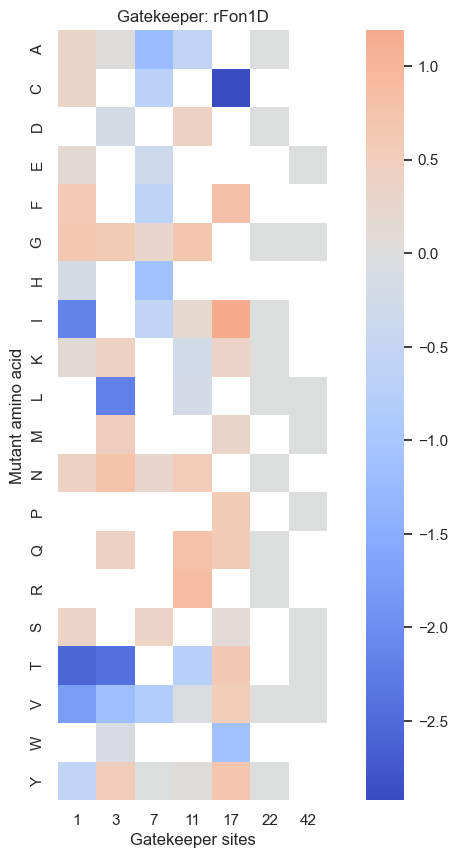

In [48]:
# rFon1D heatmap
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(gk_os_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0)
plt.title("Gatekeeper: rFon1D")
plt.xlabel("Gatekeeper sites")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "gatekeeper_heatmap_os.png", dpi=400)

In [49]:
# calculate difference

gk_diffs = np.empty((n_gk, 20))
gk_diffs[:] = np.nan

for i in range(n_gk):
    for j in range(20):
        curr_rFon1D = gk_rFon1D[i][j]
        curr_seuma = gk_seuma[i][j]
        if not (np.isnan(curr_rFon1D)):
            rFon1D_sign = np.sign(curr_rFon1D)
            seuma_sign = np.sign(curr_seuma)
            if rFon1D_sign == seuma_sign:
                gk_diffs[i][j] = 0
            else:
                gk_diffs[i][j] = rFon1D_sign

gk_diffs_hm = np.swapaxes(gk_diffs, 0, 1)
gk_diffs_df = pd.DataFrame(gk_diffs_hm, columns=gk_sites)
gk_diffs_df

,1,3,7,11,17,22,42
0,0.0,0.0,-1.0,-1.0,NaN,0.0,NaN
1,0.0,NaN,0.0,NaN,0.0,NaN,NaN
2,NaN,0.0,NaN,0.0,NaN,0.0,NaN
3,0.0,NaN,0.0,NaN,NaN,NaN,0.0
4,0.0,NaN,0.0,NaN,0.0,NaN,NaN
5,0.0,0.0,0.0,0.0,NaN,0.0,0.0
6,-1.0,NaN,-1.0,NaN,NaN,NaN,NaN
7,0.0,NaN,0.0,1.0,0.0,0.0,NaN
8,1.0,0.0,NaN,-1.0,0.0,0.0,NaN
9,NaN,0.0,NaN,0.0,NaN,0.0,0.0


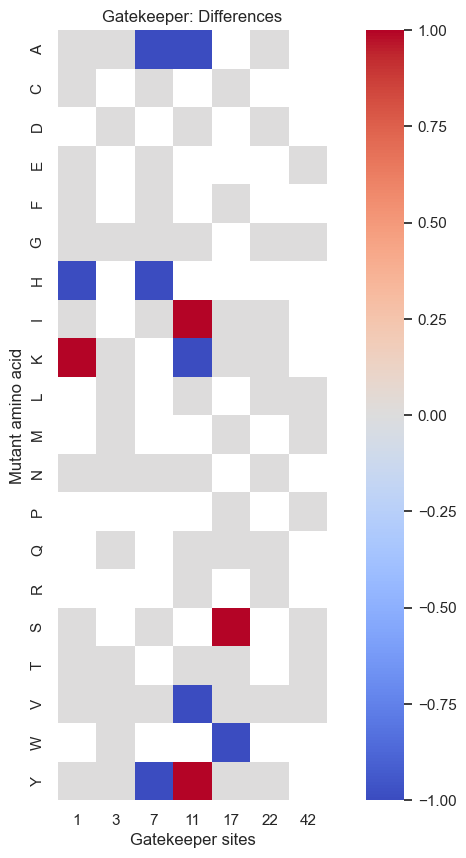

In [50]:
# rFon1D heatmap
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    gk_diffs_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("Gatekeeper: Differences")
plt.xlabel("Gatekeeper sites")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "gatekeeper_heatmap_diffs.png", dpi=400)

## N-terminus (without gatekeepers)

In [51]:
# prep N-terminus array

n_nterm = len(nterm_sites)

nterm_seuma = np.zeros((n_nterm, 20))

for i in range(n_nterm):
    site = nterm_sites[i] - 1
    site_arr = seuma_arr[site]
    nterm_seuma[i] = site_arr

nterm_seuma_hm = np.swapaxes(nterm_seuma, 0, 1)
nterm_seuma_df = pd.DataFrame(nterm_seuma_hm, columns=nterm_sites)
nterm_seuma_df

,2,4,5,6,8,9,10,12,13,14,15,16,18,19,20,21,23,24,25,26
0,NaN,NaN,NaN,NaN,0.078120,-0.149962,NaN,0.076336,NaN,NaN,NaN,NaN,-0.988751,NaN,NaN,NaN,-1.165830,-0.085449,-0.538893,-0.391315
1,NaN,-0.463771,-1.244535,-1.022535,NaN,-0.119992,-0.152592,NaN,0.204387,-0.835477,NaN,NaN,NaN,-1.965409,-1.539518,NaN,-1.999179,NaN,-0.436081,-1.161419
2,-0.300830,NaN,NaN,-0.677276,NaN,-0.401728,-0.208486,-0.139416,-1.026423,-0.710497,-2.742657,-1.670166,0.769885,0.050165,-2.531654,-2.107868,NaN,-1.175551,-2.000013,NaN
3,-0.672862,NaN,NaN,-2.182229,NaN,-0.814406,NaN,-0.276743,NaN,NaN,-0.644119,-1.193440,-0.712313,NaN,NaN,-1.312322,0.631693,-0.876503,-2.805847,NaN
4,NaN,NaN,NaN,-1.310450,0.597708,NaN,-0.073182,-0.009056,0.378599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.796501,NaN,-1.548223,-0.769686
5,-0.035591,NaN,-0.556560,NaN,NaN,NaN,NaN,0.176766,NaN,NaN,NaN,-0.720774,-0.660585,NaN,NaN,0.136491,0.902609,0.613677,NaN,NaN
6,NaN,-0.824367,-0.408330,NaN,NaN,NaN,0.069615,-2.419121,NaN,NaN,0.366727,-0.242749,NaN,-1.177754,-0.476183,NaN,-0.273098,NaN,NaN,NaN
7,-2.697274,-0.410450,-0.846089,-0.564898,-0.692542,NaN,-0.240041,-0.152257,0.785261,1.153705,0.648731,-1.971474,0.212595,0.967033,0.729106,0.606516,-3.872658,0.845132,NaN,-0.136203
8,-0.773028,NaN,0.014741,-1.990056,-1.241947,NaN,0.266066,NaN,-1.231733,0.561405,-0.822473,NaN,-1.230799,NaN,NaN,NaN,-0.748783,0.181192,NaN,-0.824322
9,-1.577991,-0.650691,-0.903721,-1.317496,-0.440896,-1.019382,-2.105383,-0.478940,-0.820667,-0.153574,0.061921,-1.737413,-1.246788,-0.180672,-0.424674,NaN,NaN,-0.418399,NaN,0.032980


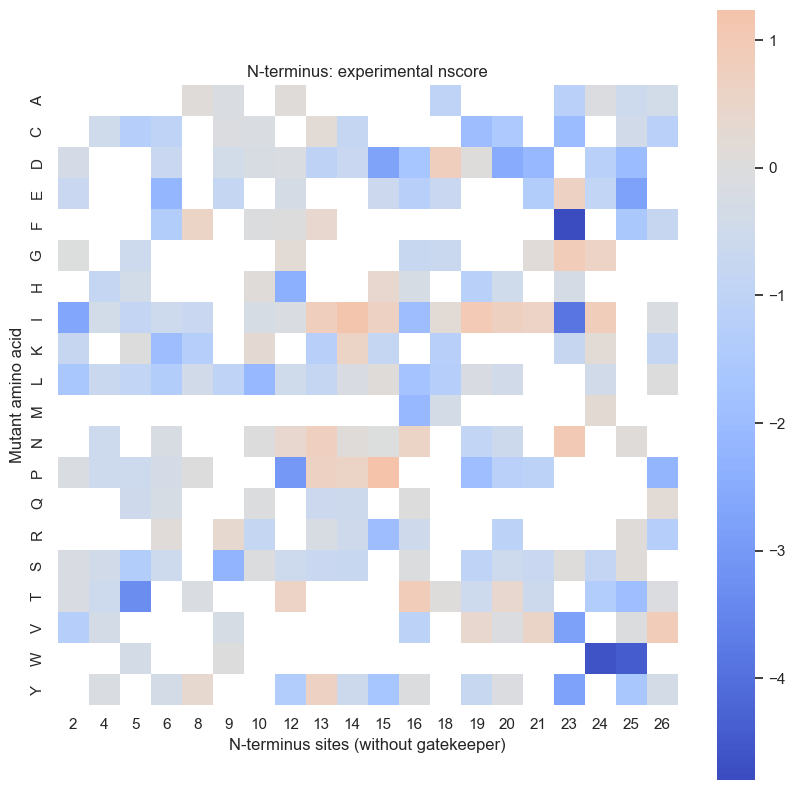

In [52]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    nterm_seuma_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("N-terminus: experimental nscore")
plt.xlabel("N-terminus sites (without gatekeeper)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "nterm_heatmap_exp.png", dpi=400)

In [53]:
for i in range(n_nterm):
    for j in range(20):
        if np.isnan(nterm_seuma[i][j]):
            nterm_rFon1D[i][j] = np.nan

nterm_rFon1D_hm = np.swapaxes(nterm_rFon1D, 0, 1)
nterm_rFon1D_df = pd.DataFrame(nterm_rFon1D_hm, columns=nterm_sites)
nterm_rFon1D_df

,2,4,5,6,8,9,10,12,13,14,15,16,18,19,20,21,23,24,25,26
0,NaN,NaN,NaN,NaN,-0.203276,-1.394358,NaN,0.471899,NaN,NaN,NaN,NaN,-0.453421,NaN,NaN,NaN,-0.116237,0.332712,-0.865002,0.0
1,NaN,0.169414,-0.194971,0.092889,NaN,0.929982,0.215752,NaN,1.254478,0.214236,NaN,NaN,NaN,-1.958122,-1.204125,NaN,-0.949890,NaN,-0.133001,0.0
2,0.749077,NaN,NaN,-0.846822,NaN,0.648143,-0.900339,0.255274,-1.182925,-1.048195,-1.693638,-0.620757,1.820183,1.100200,-1.482558,0.0,NaN,-0.125962,-1.687038,NaN
3,-0.362753,NaN,NaN,-1.067248,NaN,-0.814853,NaN,0.773173,NaN,NaN,-0.805480,-0.872917,-0.113895,NaN,NaN,0.0,1.009215,-0.580824,-1.756851,NaN
4,NaN,NaN,NaN,-0.195136,1.647942,NaN,0.308172,-0.165872,1.428754,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-3.748229,NaN,-0.498770,0.0
5,0.379826,NaN,-0.804573,NaN,NaN,NaN,NaN,0.334168,NaN,NaN,NaN,0.328981,-0.438906,NaN,NaN,0.0,1.359447,0.781841,NaN,NaN
6,NaN,0.225350,0.641538,NaN,NaN,NaN,0.431945,-1.369985,NaN,NaN,0.764093,0.807180,NaN,-0.128166,0.573661,NaN,0.231819,NaN,NaN,NaN
7,-1.648238,-0.027799,0.203620,0.550701,0.357223,NaN,0.809888,0.319750,1.835564,2.204142,1.698984,-1.397687,1.262690,1.524139,1.087100,0.0,-2.824050,1.895457,NaN,0.0
8,0.276708,NaN,1.064763,-0.875001,-0.192382,NaN,1.316180,NaN,-0.182164,1.611626,-0.786750,NaN,-0.181230,NaN,NaN,NaN,0.300961,0.504213,NaN,0.0
9,-0.528548,-0.329323,-0.569285,-0.780243,-0.297653,0.030264,-0.787612,-0.648783,-0.554172,0.210045,0.188803,-0.688028,-1.164397,-0.021796,0.126725,NaN,NaN,-0.761245,NaN,0.0


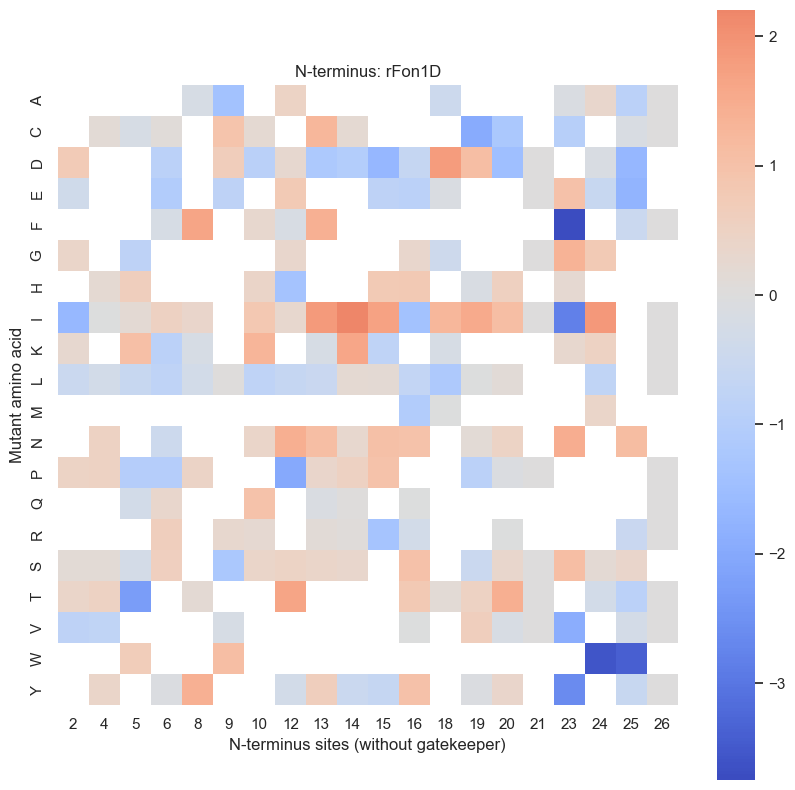

In [54]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    nterm_rFon1D_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("N-terminus: rFon1D")
plt.xlabel("N-terminus sites (without gatekeeper)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "nterm_heatmap_os.png", dpi=400)

In [55]:
# calculate difference

nterm_diffs = np.empty((n_nterm, 20))
nterm_diffs[:] = np.nan

for i in range(n_nterm):
    for j in range(20):
        curr_rFon1D = nterm_rFon1D[i][j]
        curr_seuma = nterm_seuma[i][j]
        if not (np.isnan(curr_rFon1D)):
            rFon1D_sign = np.sign(curr_rFon1D)
            seuma_sign = np.sign(curr_seuma)
            if rFon1D_sign == seuma_sign:
                nterm_diffs[i][j] = 0
            else:
                nterm_diffs[i][j] = rFon1D_sign

nterm_diffs_hm = np.swapaxes(nterm_diffs, 0, 1)
nterm_diffs_df = pd.DataFrame(nterm_diffs_hm, columns=nterm_sites)
nterm_diffs_df

,2,4,5,6,8,9,10,12,13,14,15,16,18,19,20,21,23,24,25,26
0,NaN,NaN,NaN,NaN,-1.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,1.0,0.0,0.0
1,NaN,1.0,0.0,1.0,NaN,1.0,1.0,NaN,0.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,0.0,NaN,0.0,0.0
2,1.0,NaN,NaN,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
3,0.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN
4,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0
5,1.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN
6,NaN,1.0,1.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,NaN,0.0,1.0,NaN,1.0,NaN,NaN,NaN
7,0.0,0.0,1.0,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
8,1.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,1.0,0.0,NaN,0.0
9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,0.0


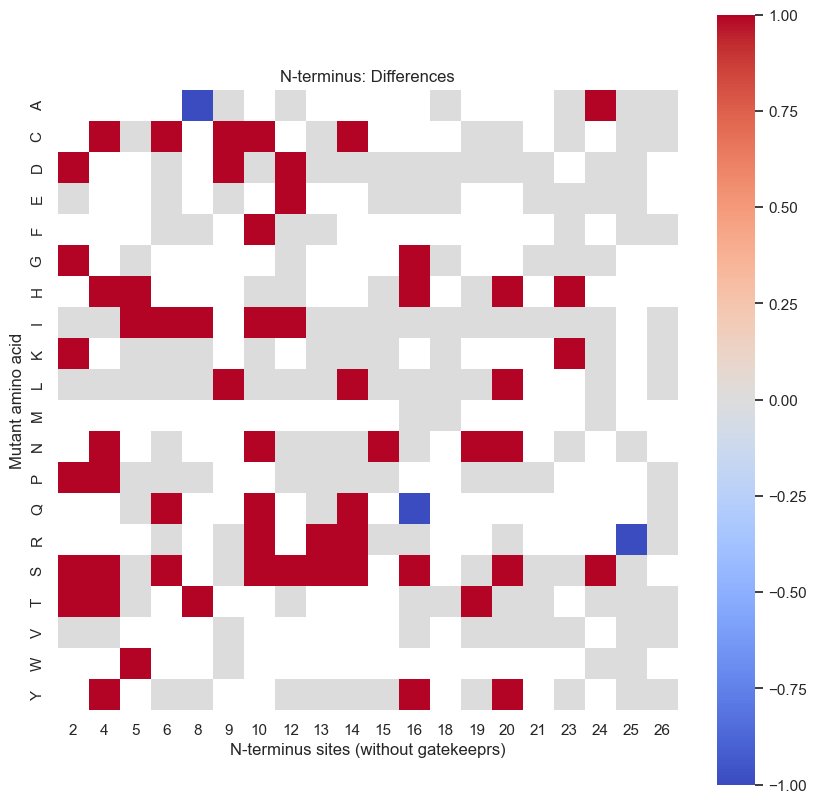

In [56]:
# rFon1D heatmap
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    nterm_diffs_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("N-terminus: Differences")
plt.xlabel("N-terminus sites (without gatekeeprs)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "nterm_heatmap_diffs.png", dpi=400)

## C-terminus (without gatekeepers)

In [57]:
# prep C-terminus array

n_cterm = len(cterm_sites)

cterm_seuma = np.zeros((n_cterm, 20))

for i in range(n_cterm):
    site = cterm_sites[i] - 1
    site_arr = seuma_arr[site]
    cterm_seuma[i] = site_arr

cterm_seuma_hm = np.swapaxes(cterm_seuma, 0, 1)
cterm_seuma_df = pd.DataFrame(cterm_seuma_hm, columns=cterm_sites)
cterm_seuma_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,-1.689952,NaN,-1.779932,NaN,-2.916001,-3.351156,-2.709346,NaN,-3.760430,-1.842724,-2.827751,-3.648521,-2.976645,-3.179871,-3.784214
1,-2.007779,NaN,-0.740267,NaN,NaN,NaN,-3.831477,-2.162962,NaN,NaN,-0.808935,-0.789382,NaN,NaN,NaN
2,-3.565531,-3.122773,-3.186548,-3.640094,-3.850256,-2.863173,-2.930110,-3.802200,NaN,-3.747420,-3.108049,-2.178221,-3.847106,-3.373048,NaN
3,NaN,-2.287829,-3.165032,-3.442186,NaN,NaN,-2.951418,NaN,-4.764610,-2.925449,-3.137079,-3.529928,-3.917150,-4.663791,-4.399539
4,0.596884,NaN,NaN,NaN,-1.671108,-2.781495,NaN,-0.751524,-3.349200,NaN,-1.503000,-1.203237,-2.285386,-2.092175,0.622472
5,-4.672743,-1.181555,NaN,-0.004876,NaN,NaN,NaN,NaN,NaN,-2.460528,NaN,NaN,-4.356966,-3.507555,NaN
6,-0.533505,-0.447601,NaN,NaN,NaN,-4.401324,NaN,-2.870179,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.341534,-1.288714,NaN,1.562278,NaN,NaN,NaN,1.100027,-1.973100,0.370788,-3.565593,NaN,0.111547,-1.428310,NaN
8,-2.827167,NaN,NaN,NaN,-3.228012,-3.459894,-0.650592,NaN,-3.822602,-3.609775,NaN,NaN,NaN,NaN,-3.059370
9,-1.549906,-3.483669,NaN,-1.162908,-3.496214,-3.123671,NaN,NaN,-2.920762,0.635696,NaN,-4.535588,-1.607795,-2.522822,-1.705262


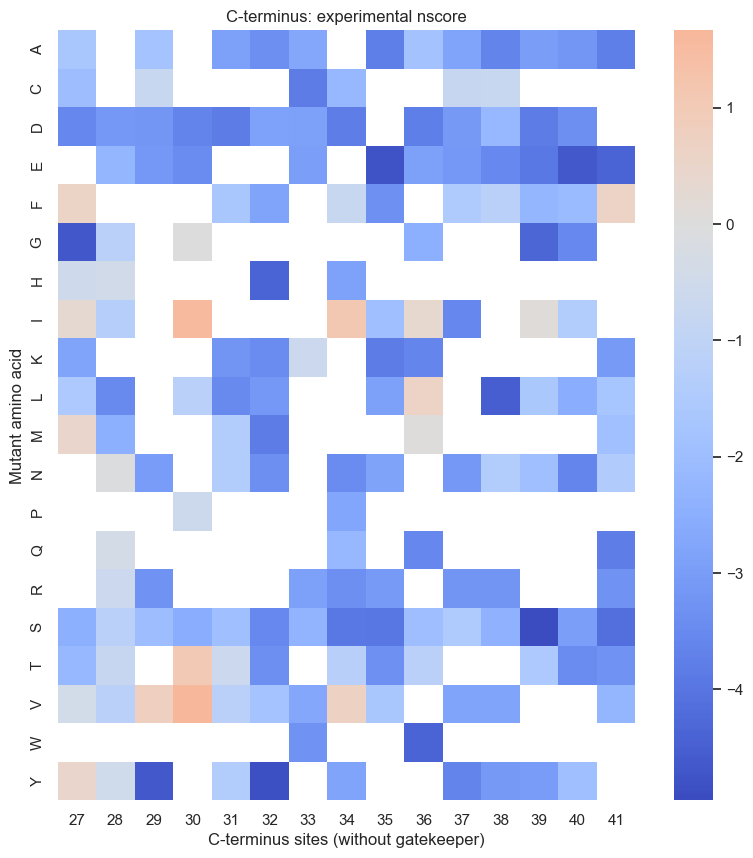

In [58]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    cterm_seuma_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: experimental nscore")
plt.xlabel("C-terminus sites (without gatekeeper)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cterm_heatmap_exp.png", dpi=400)

In [59]:
for i in range(n_cterm):
    for j in range(20):
        if np.isnan(cterm_seuma[i][j]):
            cterm_rFon1D[i][j] = np.nan

cterm_rFon1D_hm = np.swapaxes(cterm_rFon1D, 0, 1)
cterm_rFon1D_df = pd.DataFrame(cterm_rFon1D_hm, columns=cterm_sites)
cterm_rFon1D_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.375441,NaN,-0.077686,NaN,0.148497,-0.286975,-0.455549,NaN,-0.696548,-0.170993,-0.946974,-1.347691,-0.808233,0.0,0.0
1,1.057382,NaN,0.263673,NaN,NaN,NaN,-0.767646,0.902086,NaN,NaN,0.596764,0.481440,NaN,NaN,NaN
2,-1.066950,-0.058426,-0.901391,-0.576124,-0.786439,0.201364,0.134378,-0.738349,NaN,-0.683528,-1.005874,-0.031816,-1.069417,0.0,NaN
3,NaN,-0.437216,-0.100715,-1.190310,NaN,NaN,-0.908601,NaN,-1.701461,-0.605067,-0.072742,-0.465878,-0.787485,0.0,0.0
4,3.663946,NaN,NaN,NaN,-0.358312,-0.801481,NaN,0.412876,-0.285017,NaN,1.562530,1.862511,-0.253572,0.0,0.0
5,-1.609527,1.884209,NaN,-0.115641,NaN,NaN,NaN,NaN,NaN,-0.738655,NaN,NaN,-1.164562,0.0,NaN
6,0.287886,2.618698,NaN,NaN,NaN,-1.337909,NaN,-0.767047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.364786,-0.203798,NaN,4.630044,NaN,NaN,NaN,1.831881,-0.157427,3.437685,-0.501568,NaN,1.267372,0.0,NaN
8,-0.750140,NaN,NaN,NaN,-0.163741,-0.395793,2.415559,NaN,-1.383917,-0.545783,NaN,NaN,NaN,NaN,0.0
9,1.515590,-0.419585,NaN,1.902870,-0.420387,-0.756441,NaN,NaN,-0.398027,0.769674,NaN,-1.472271,0.172628,0.0,0.0


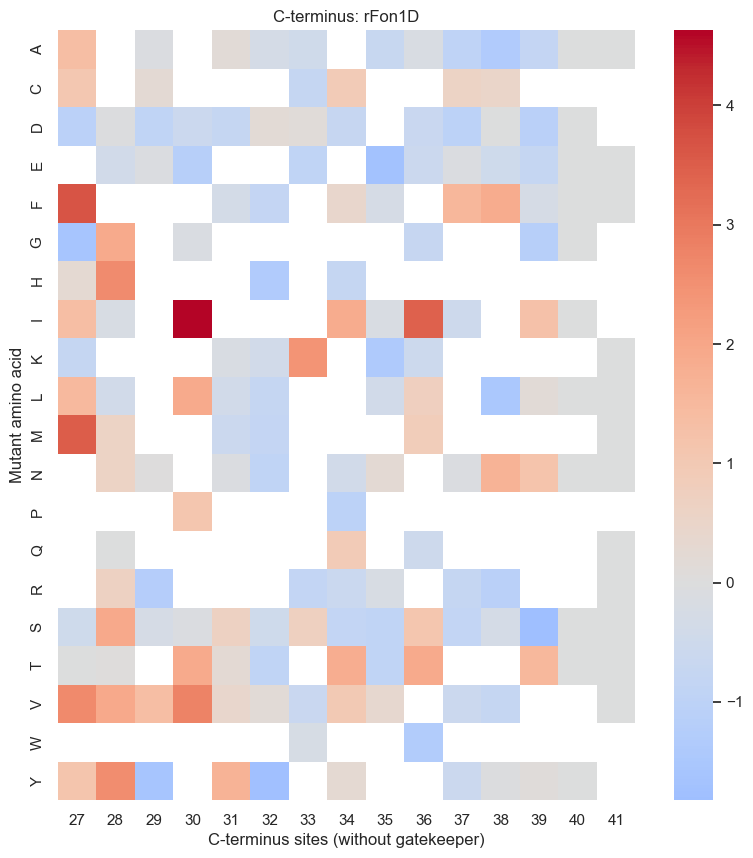

In [60]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    cterm_rFon1D_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: rFon1D")
plt.xlabel("C-terminus sites (without gatekeeper)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cterm_heatmap_os.png", dpi=400)

In [61]:
# calculate difference

cterm_diffs = np.empty((n_cterm, 20))
cterm_diffs[:] = np.nan

for i in range(n_cterm):
    for j in range(20):
        curr_rFon1D = cterm_rFon1D[i][j]
        curr_seuma = cterm_seuma[i][j]
        if not (np.isnan(curr_rFon1D)):
            rFon1D_sign = np.sign(curr_rFon1D)
            seuma_sign = np.sign(curr_seuma)
            if rFon1D_sign == seuma_sign:
                cterm_diffs[i][j] = 0
            else:
                cterm_diffs[i][j] = rFon1D_sign

cterm_diffs_hm = np.swapaxes(cterm_diffs, 0, 1)
cterm_diffs_df = pd.DataFrame(cterm_diffs_hm, columns=cterm_sites)
cterm_diffs_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN
3,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0
5,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN
6,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN
8,0.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0
9,1.0,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0


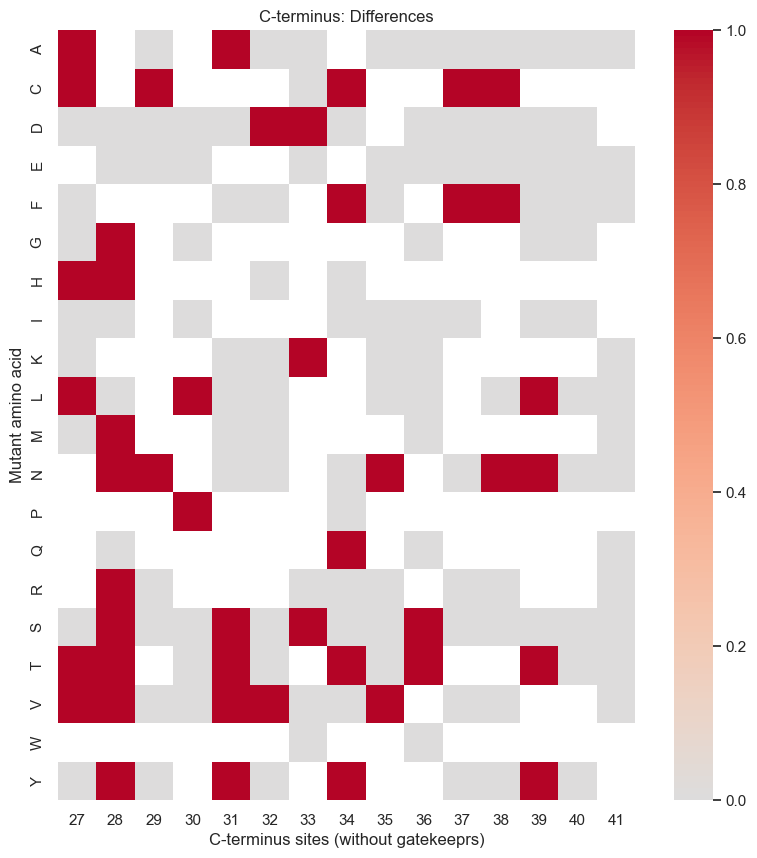

In [62]:
# rFon1D heatmap
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    cterm_diffs_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: Differences")
plt.xlabel("C-terminus sites (without gatekeeprs)")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cterm_heatmap_diffs.png", dpi=400)

## CGK

In [63]:
# prep cgk array

n_cgk = len(cgk_sites)

cgk_seuma = np.zeros((n_cgk, 20))

for i in range(n_cgk):
    site = cgk_sites[i] - 1
    site_arr = seuma_arr[site]
    cgk_seuma[i] = site_arr

cgk_seuma_hm = np.swapaxes(cgk_seuma, 0, 1)
cgk_seuma_df = pd.DataFrame(cgk_seuma_hm, columns=cgk_sites)
cgk_seuma_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,-1.689952,NaN,-1.779932,NaN,-2.916001,-3.351156,-2.709346,NaN,-3.760430,-1.842724,-2.827751,-3.648521,-2.976645,-3.179871,-3.784214,NaN
1,-2.007779,NaN,-0.740267,NaN,NaN,NaN,-3.831477,-2.162962,NaN,NaN,-0.808935,-0.789382,NaN,NaN,NaN,NaN
2,-3.565531,-3.122773,-3.186548,-3.640094,-3.850256,-2.863173,-2.930110,-3.802200,NaN,-3.747420,-3.108049,-2.178221,-3.847106,-3.373048,NaN,NaN
3,NaN,-2.287829,-3.165032,-3.442186,NaN,NaN,-2.951418,NaN,-4.764610,-2.925449,-3.137079,-3.529928,-3.917150,-4.663791,-4.399539,-2.877642
4,0.596884,NaN,NaN,NaN,-1.671108,-2.781495,NaN,-0.751524,-3.349200,NaN,-1.503000,-1.203237,-2.285386,-2.092175,0.622472,NaN
5,-4.672743,-1.181555,NaN,-0.004876,NaN,NaN,NaN,NaN,NaN,-2.460528,NaN,NaN,-4.356966,-3.507555,NaN,-1.970039
6,-0.533505,-0.447601,NaN,NaN,NaN,-4.401324,NaN,-2.870179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.341534,-1.288714,NaN,1.562278,NaN,NaN,NaN,1.100027,-1.973100,0.370788,-3.565593,NaN,0.111547,-1.428310,NaN,NaN
8,-2.827167,NaN,NaN,NaN,-3.228012,-3.459894,-0.650592,NaN,-3.822602,-3.609775,NaN,NaN,NaN,NaN,-3.059370,NaN
9,-1.549906,-3.483669,NaN,-1.162908,-3.496214,-3.123671,NaN,NaN,-2.920762,0.635696,NaN,-4.535588,-1.607795,-2.522822,-1.705262,0.982337


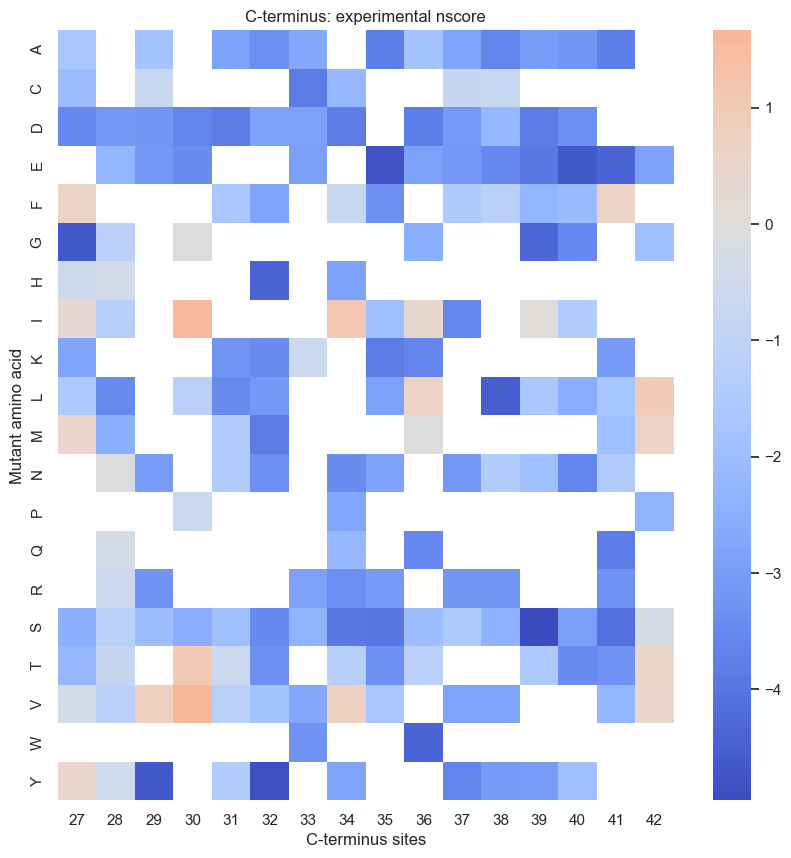

In [64]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    cgk_seuma_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: experimental nscore")
plt.xlabel("C-terminus sites")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cgk_heatmap_exp.png", dpi=400)

In [65]:
for i in range(n_cgk):
    for j in range(20):
        if np.isnan(cgk_seuma[i][j]):
            cgk_rFon1D[i][j] = np.nan

cgk_rFon1D_hm = np.swapaxes(cgk_rFon1D, 0, 1)
cgk_rFon1D_df = pd.DataFrame(cgk_rFon1D_hm, columns=cgk_sites)
cgk_rFon1D_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.454053,NaN,-0.072782,NaN,0.227225,-0.208207,-0.572010,NaN,-0.617740,-0.120504,-0.879757,-1.291399,-0.866031,-0.837536,-0.615213,NaN
1,1.136023,NaN,0.333132,NaN,NaN,NaN,-0.688832,0.980742,NaN,NaN,0.648597,0.473292,NaN,NaN,NaN,NaN
2,-1.046028,0.020321,-0.928966,-0.497328,-0.707623,0.280087,0.213107,-0.659537,NaN,-0.604722,-1.010479,-0.039052,-1.118220,-0.969436,NaN,NaN
3,NaN,-0.400574,-0.021964,-1.195895,NaN,NaN,-0.902364,NaN,-1.622558,-0.566057,0.006006,-0.387093,-0.774560,-1.521676,-1.230911,0.0
4,3.742340,NaN,NaN,NaN,-0.293975,-0.788824,NaN,0.522770,-0.206249,NaN,1.641124,1.941076,-0.215956,-0.129540,3.794145,NaN
5,-1.530633,1.962773,NaN,-0.086168,NaN,NaN,NaN,NaN,NaN,-0.662981,NaN,NaN,-1.117285,-0.952390,NaN,0.0
6,0.164258,2.697192,NaN,NaN,NaN,-1.259041,NaN,-0.696956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.416971,-0.132352,NaN,4.708347,NaN,NaN,NaN,1.869768,-0.148873,3.516101,-0.422779,NaN,1.323722,0.124792,NaN,NaN
8,-0.669986,NaN,NaN,NaN,-0.084984,-0.317014,2.494072,NaN,-1.389525,-0.466990,NaN,NaN,NaN,NaN,-0.647287,NaN
9,1.594188,-0.340804,NaN,1.981431,-0.362970,-0.677506,NaN,NaN,-0.408867,0.818894,NaN,-1.393390,0.045126,-0.137610,-0.124552,0.0


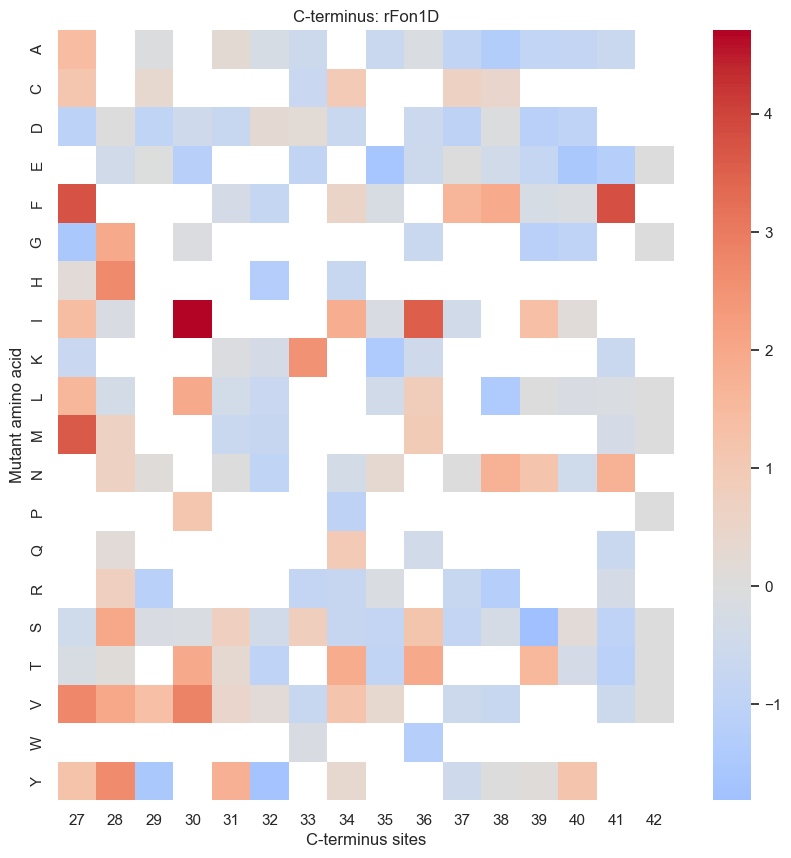

In [66]:
sns.set(rc={"figure.figsize": (10, 10)})
sns.heatmap(
    cgk_rFon1D_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: rFon1D")
plt.xlabel("C-terminus sites")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cgk_heatmap_os.png", dpi=400)

In [67]:
# calculate difference

cgk_diffs = np.empty((n_cgk, 20))
cgk_diffs[:] = np.nan

for i in range(n_cgk):
    for j in range(20):
        curr_rFon1D = cgk_rFon1D[i][j]
        curr_seuma = cgk_seuma[i][j]
        if not (np.isnan(curr_rFon1D)):
            rFon1D_sign = np.sign(curr_rFon1D)
            seuma_sign = np.sign(curr_seuma)
            if rFon1D_sign == seuma_sign:
                cgk_diffs[i][j] = 0
            else:
                cgk_diffs[i][j] = rFon1D_sign

cgk_diffs_hm = np.swapaxes(cgk_diffs, 0, 1)
cgk_diffs_df = pd.DataFrame(cgk_diffs_hm, columns=cgk_sites)
cgk_diffs_df

,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42
0,1.0,NaN,0.0,NaN,1.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,1.0,NaN,1.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN
3,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,NaN,NaN,NaN,0.0,0.0,NaN,1.0,0.0,NaN,1.0,1.0,0.0,0.0,0.0,NaN
5,0.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0,NaN,0.0
6,1.0,1.0,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,1.0,NaN,NaN
8,0.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN
9,1.0,0.0,NaN,1.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,0.0,1.0,0.0,0.0,0.0


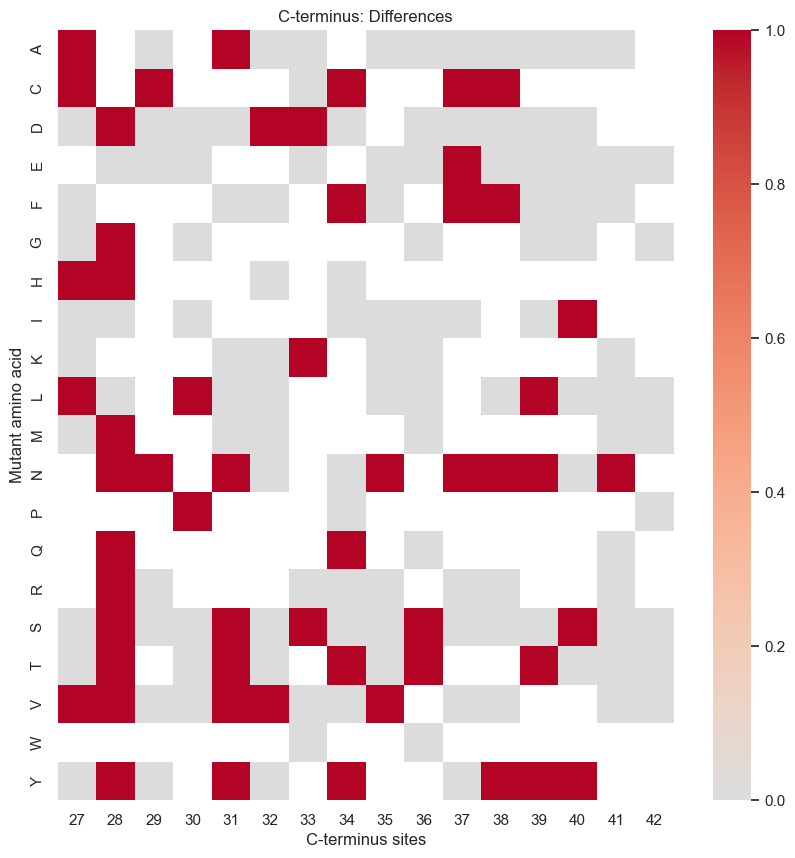

In [68]:
# rFon1D heatmap
sns.heatmap(
    cgk_diffs_df, square=True, yticklabels=AAs, cmap="coolwarm_nanwhite", center=0
)
plt.title("C-terminus: Differences")
plt.xlabel("C-terminus sites")
plt.ylabel("Mutant amino acid")
plt.savefig(out_dir + "cgk_heatmap_diffs.png", dpi=400)